In [147]:
import numpy as np
import gp_optimise
import matplotlib.pyplot as plt
import importlib
from sklearn.gaussian_process.kernels import RBF,WhiteKernel
importlib.reload(gp_optimise)

<module 'gp_optimise' from '/home/cda523/Documents/Positrons/gp_optimise/gp_optimise.py'>

In [148]:
rng = np.random.default_rng()
fun0 = lambda x : np.exp(-(x)**2)
fun = lambda x : np.exp(-(x)**2) + 0.1*rng.standard_normal(len(x))*np.exp((x)**2)
dims = [{'name':'x','type':'uniform','min':-2,'max':2}]

In [156]:
def fun2(x):
    err = 0.1*x*rng.standard_normal(len(x))
    y = np.exp(-(x)**2) + np.mean(err)
    yerr = np.std(err)
    return y,yerr

In [157]:
kernel = 1*RBF(length_scale_bounds=(1e-1, 1e1))# + WhiteKernel(noise_level_bounds=(1e-2, 1e2))
gpo = gp_optimise.Gp_optimise(fun2,dims,kernel)

In [158]:
gpo.initialise(20)

/home/cda523/.local/lib/python3.6/site-packages/sklearn/gaussian_process/_gpr.py:506: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/cda523/.local/lib/python3.6/site-packages/sklearn/gaussian_process/kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)


0.995**2 * RBF(length_scale=0.1)

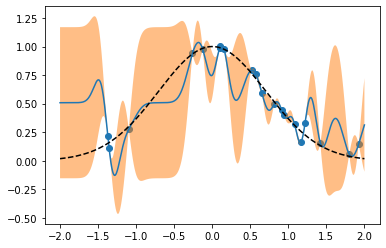

In [159]:
X_test = np.linspace(start=-2, stop=2, num=1000).reshape(-1, 1)
y_test,std_test = gpo.gaussian_process.predict(X_test, return_std=True)
plt.scatter(gpo.X,gpo.y)
plt.plot(X_test,y_test)
plt.fill_between(X_test.ravel(),y_test-2*std_test,y_test+2*std_test,alpha=0.5)
plt.plot(X_test,fun0(X_test),'k--')
gpo.gaussian_process.kernel_

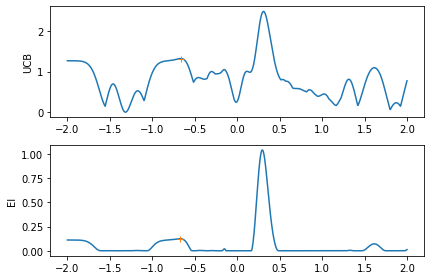

In [163]:
acq_test1 = gpo.acquisition_function(X_test,explore=1,acq_fn='UCB')
acq_test2 = gpo.acquisition_function(X_test,explore=0.01,acq_fn='EI')

nxt1 = gpo.next_acquisition(Nacq=10,explore=1,acq_fn='UCB')
nxt2 = gpo.next_acquisition(Nacq=10,explore=0.01,acq_fn='EI')

plt.subplot(2,1,1)
plt.plot(X_test,acq_test1)
plt.plot(nxt1,gpo.acquisition_function(nxt1,explore=1,acq_fn='UCB'),'+')
plt.ylabel('UCB')
plt.subplot(2,1,2)
plt.plot(X_test,acq_test2)
plt.plot(nxt2,gpo.acquisition_function(nxt2,explore=0.01,acq_fn='EI'),'+')
plt.ylabel('EI')
plt.tight_layout()


In [164]:
N_new = 5
gpo.optimise(N_new,Nacq=10,explore=1,acq_fn='UCB')

/home/cda523/.local/lib/python3.6/site-packages/sklearn/gaussian_process/kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
/home/cda523/.local/lib/python3.6/site-packages/sklearn/gaussian_process/kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
/home/cda523/.local/lib/python3.6/site-packages/sklearn/gaussian_process/kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)


LinAlgError: ("The kernel, 1**2 * RBF(length_scale=1), is not returning a positive definite matrix. Try gradually increasing the 'alpha' parameter of your GaussianProcessRegressor estimator.", '13-th leading minor of the array is not positive definite')

array([[-0.76726737]])

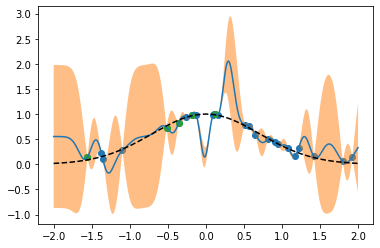

In [162]:
plt.scatter(gpo.X,gpo.y)
y_test,std_test = gpo.gaussian_process.predict(X_test, return_std=True)
plt.plot(X_test,y_test)
plt.fill_between(X_test.ravel(),y_test-2*std_test,y_test+2*std_test,alpha=0.5)
plt.scatter(gpo.X[-N_new:,0],gpo.y[-N_new:])
plt.plot(X_test,fun0(X_test),'k--')
gpo.next_acquisition(Nacq=10,explore=10,acq_fn='UCB')